In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Newton's Method
Testing Newton's method:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

On a number of optimization problems, and testing the fractal patterns it creates like the experiment from John H. Hubbard.

In [21]:
def visualize(x_array, log_color_scale = False):
    x_array = np.array(x_array)

    if log_color_scale:
        plt.scatter(x_array[:,0], x_array[:,1], s = 50,\
                    c = np.log(np.arange(1, len(x_array)+1, 1)),\
                    cmap = 'viridis_r')
    else:
        plt.scatter(x_array[:,0], x_array[:,1], s = 50, c = np.arange(len(x_array)),\
                cmap = 'viridis_r')
    plt.plot(x_array[:,0],x_array[:,1], zorder=2) 
    plt.xlabel('x_k[0]')
    plt.ylabel('x_k[1]')
    cbar = plt.colorbar()
    cbar.set_label("Iteration number")
    plt.show()
    
def visualize_comparison(x_grad, x_newton):
    x_grad = np.array(x_grad)
    x_newton = np.array(x_newton)
        
    plt.scatter(x_grad[:,0], x_grad[:,1], s = 5)
    plt.plot(x_grad[:,0],x_grad[:,1], 'o-', zorder=2,  label = 'Gradient Descent')    
    plt.scatter(x_newton[:,0], x_newton[:,1], s = 5)
    plt.plot(x_newton[:,0],x_newton[:,1], 'o-', zorder=2,  label = "Newton's method") 
    plt.xlabel('x_k[0]')
    plt.ylabel('x_k[1]')
    plt.legend()
    plt.show()

### Minimizing a quadratic
Consider the following unconstrained convex optimization problem,
\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (32x_1^2 + x_2^2 \right)
\end{aligned}

Clearly, the optimal value of the problem is $0$ and $x_1^* = x_2^*= 0$.

**Using gradient descent**
With the update equation to get $x_{k+1}$ from $x_{k}$. Assume that the stepsize used is $\eta$.

In [4]:
def gradient_descent(gradient,x, stepsize, eps = 1e-6, max_iters = 100):
    x_array = [x]
    num_iters =1
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize*gradient(x)
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps: #We stop if the change in x is below a certain threshold
            break
        num_iters += 1
        prev_x = x
    
    return x_array, num_iters

def gradient(x):
    """Return gradient at x"""
    grad  = np.array([32*x[0], x[1]]).astype('float')
    return grad

def f(x):
    """Return f(x)"""
    fx = 1/2 * (32 * x[0]**2 + x[1]**2)
    return fx

Starting with $x_0 = [0.1,1]$ for gradient descent.

For different values of $\eta$.
1. $\eta = \frac{2}{31.9}$
2. $\eta = \frac{2}{35}$
3. $\eta = \frac{2}{128}$

In [24]:
max_iters = 1000
x0 = np.array([0.1, 1])

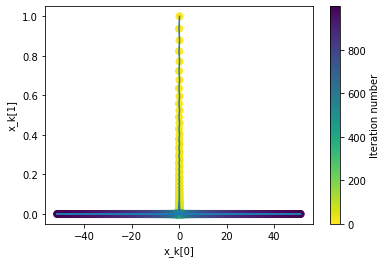

('eta: 0.06269592476489029',
 1000,
 'solution: [-51.4796   0.    ]',
 'final objective [ 7.02327917e+06 -1.00000000e+00]')

In [25]:
eta =2/31.9
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

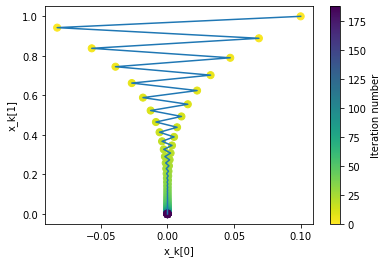

('eta: 0.05714285714285714',
 188,
 'solution: [0. 0.]',
 'final objective [-1. -1.]')

In [26]:
eta = 2/35
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

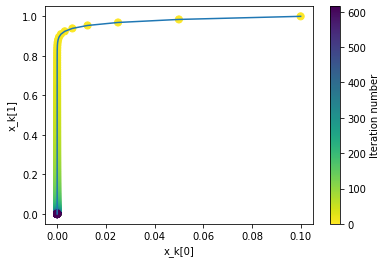

('eta: 0.015625',
 615,
 'solution: [0.     0.0001]',
 'final objective [-1. -1.]')

In [27]:
eta= 2/128
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

**Using Newton's method** It should convergence faster using the second order newton's method using the Hessian.

In [20]:
def Hessian(x):
    '''Return Hessian at x'''
    H = np.array([[32, 0], [0, 1]]).astype('float') # Fill this in
    return H

def Newton(gradient,Hessian, x,  stepsize=1.0, eps = 1e-6, max_iters = 100):
    x_array = [x]
    num_iters =1
    prev_x = float('Inf')
    while num_iters < max_iters:
        x = x - stepsize* np.matmul(np.linalg.inv(Hessian(x)),gradient(x))
        x_array.append(x) 
        if np.linalg.norm (x - prev_x) < eps:  # We stop if the change in x is below a certain threshold
            num_iters -= 1
            break
        num_iters += 1
        prev_x = x
    
    return x_array, num_iters

Starting with $x_0 = [0.1,1]$ for gradient descent.

For different values of $\eta$.
1. $\eta = \frac{2}{31.9}$
2. $\eta = \frac{2}{35}$
3. $\eta = \frac{2}{128}$

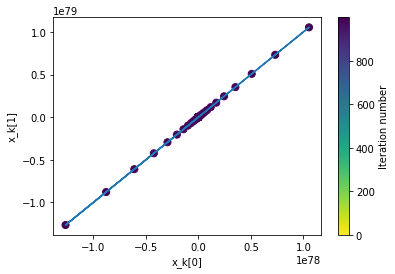

<ipython-input-12-3d35459d1147>:70: RuntimeWarning: overflow encountered in power
  f = lambda z: z**4 - 1


('eta: 2.2',
 1000,
 'solution: [-1.26492507e+78 -1.26492507e+79]',
 'final objective [inf inf]')

In [28]:
eta = 2.2
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

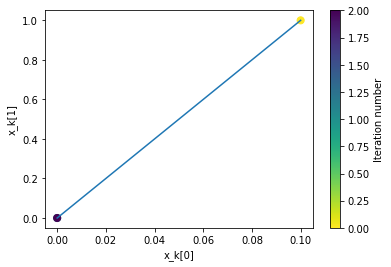

('eta: 1.0', 1, 'solution: [0. 0.]', 'final objective [-1. -1.]')

In [29]:
eta = 1.0
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

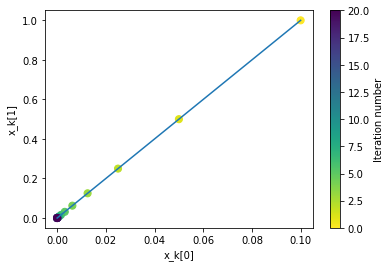

('eta: 0.5', 19, 'solution: [0. 0.]', 'final objective [-1. -1.]')

In [31]:
eta = 0.5
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

**Comparing Gradient descent and Newton's method descent paths**

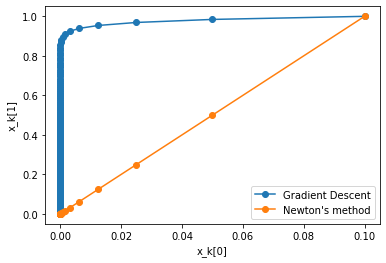

In [32]:
x_newton, num_iters = Newton(gradient, Hessian, x = x0, stepsize = 0.5, max_iters=max_iters)
x_grad, num_iters = gradient_descent(gradient, x = x0, stepsize=2/128, max_iters=max_iters)

visualize_comparison(x_grad, x_newton)

### Minimizing a non-quadratic objective
Next we consider a problem that involves minimization of an objective function that is not quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) =  \frac{1}{2} \left (10x_1^2 + x_2^2 \right) +  5\log(1 + e^{-x_1 -x_2})
\end{aligned}

We can write the update equations for both gradient descent and Newton's method for this case using the same approach that we used for the previous case. 

In [41]:
def gradient(x):
    """Return gradient at x"""
    grad  = np.array([10 * x[0] - (5/(np.exp(x[0] + x[1]) + 1)), x[1] - (5/(np.exp(x[0] + x[1]) + 1))]).astype('float')
    return grad



def Hessian(x):
    """Return Hessian at x"""
    H_00 = 10 + 5 * (np.exp(-x[0] - x[1])/(1 + np.exp(-x[0] - x[1]))**2)
    H_11 = 1 + 5 * (np.exp(-x[0] - x[1])/(1 + np.exp(-x[0] - x[1]))**2)
    H_01 = 5 * (np.exp(-x[0] - x[1])/(1 + np.exp(-x[0] - x[1]))**2)
    H_10 = 5 * (np.exp(-x[0] - x[1])/(1 + np.exp(-x[0] - x[1]))**2)
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

x0 = np.array([-20,-20])

**Using Gradient Descent**
Suppose you start with $x_0 = [-20,-20]$. 

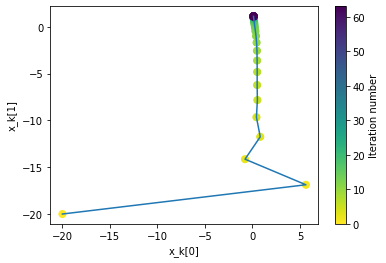

('eta: 0.125',
 63,
 'solution: [0.1125 1.1247]',
 'final objective [-0.9998  0.5999]')

In [43]:
eta= 1/8
x_grad, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=max_iters)
visualize(x_grad)


f'eta: {eta}', num_iters, f'solution: {np.around(x_grad[-1], 4)}', f'final objective {np.around(f(x_grad[-1]), 4)}'

**Using Newton's method** Suppose you start with $x_0 = [20,20]$. 

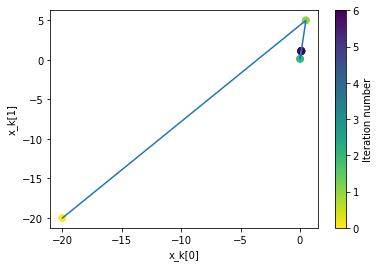

('eta: 1.0',
 5,
 'solution: [0.1125 1.1247]',
 'final objective [-0.9998  0.5999]')

In [44]:
eta = 1.0
x_newton, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=max_iters)
visualize(x_newton)

f'eta: {eta}', num_iters, f'solution: {np.around(x_newton[-1], 4)}', f'final objective {np.around(f(x_newton[-1]), 4)}'

The algorithm converges in 5 iterations (and not 1 iteration) when using stepsize of 1.0. This is because the objective function is not a quadratic.

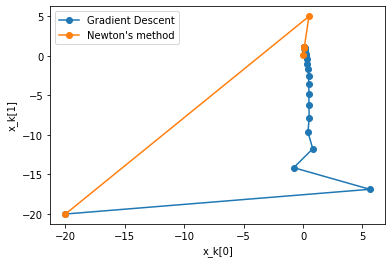

In [45]:
visualize_comparison(x_grad, x_newton)

## Minimizing a bi-quadratic objective
Next we consider a problem that involves minimization of an objective function that is bi-quadratic,

\begin{aligned}
\min_{x_1,x_2 \in \mathbb{R}} f(x_1,x_2) = x_1^4 + x_2^4 
\end{aligned}

We can write the update equations for both gradient descent and Newton's method for this case using the same approach that we used for the previous case. 

In [54]:
def gradient(x):
    """Return gradient at x"""
    grad  = np.array([4*x[0]**3, 4*x[0]**3]).astype('float')
    return grad

def Hessian(x):
    """Return Hessian at x"""
    H_00 = 12*x[0]**2
    H_11 = 12*x[1]**2
    H_01 = 0
    H_10 = 0
    H = np.array([[H_00, H_01], [H_10, H_11]]).astype('float')
    return H

x0 = np.array([10,20])

**Using gradient descent**
Suppose you start with $x_0 = [10,20]$. 

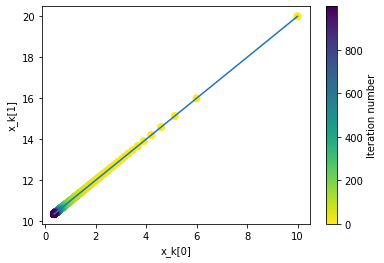

('eta: 0.001',
 1000,
 'solution: [ 0.3525 10.3525]',
 'final objective [-9.8460000e-01  1.1485441e+04]')

In [57]:
eta= 1/1000
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

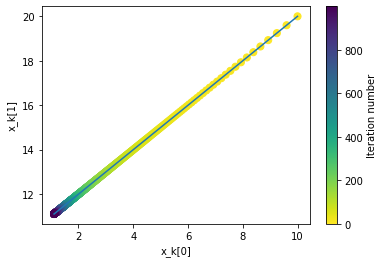

('eta: 0.0001',
 1000,
 'solution: [ 1.1098 11.1098]',
 'final objective [5.17200000e-01 1.52335973e+04]')

In [61]:
eta= 1/10000
x_array, num_iters = gradient_descent(gradient, x = x0, stepsize=eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

**Using Newton's method**
Suppose you start with $x_0 = [10,20]$. 

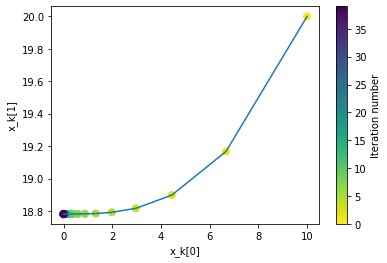

('eta: 1',
 38,
 'solution: [ 0.    18.781]',
 'final objective [-1.00000000e+00  1.24415681e+05]')

In [62]:
eta = 1
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

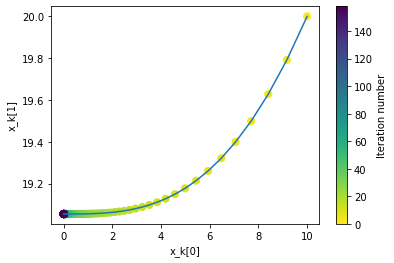

('eta: 0.25',
 157,
 'solution: [ 0.     19.0547]',
 'final objective [-1.00000000e+00  1.31828429e+05]')

In [63]:
eta = 0.25
x_array, num_iters = Newton(gradient, Hessian, x = x0, stepsize = eta, max_iters=max_iters)
visualize(x_array)

f'eta: {eta}', num_iters, f'solution: {np.around(x_array[-1], 4)}', f'final objective {np.around(f(x_array[-1]), 4)}'

## Fractal Experiment

Using the complex plane to visualize all solutions to the equation $x^3 - 1 = 0$.

<ipython-input-76-2e6c72f9a16c>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', len(roots))


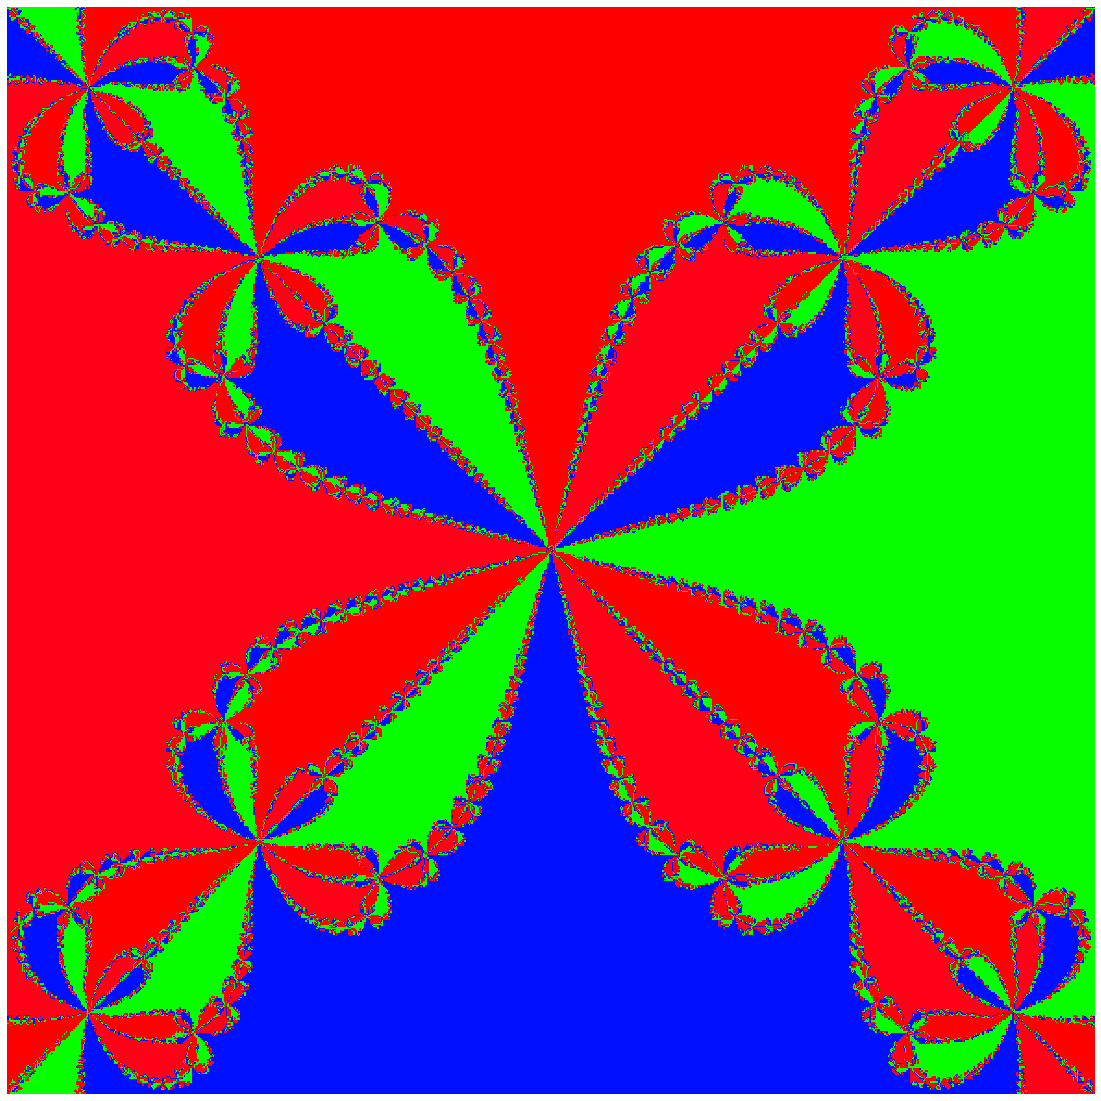

In [76]:


def newton(z0, f, fprime, max_iters=1000, eps=1e-8):
    z = z0
    for _ in range(max_iters):
        dz = f(z) / fprime(z)
        
        # Iterate untill the root is found
        if abs(dz) < epsilon:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=500, domain=(-1, 1, -1, 1), eps=1e-8):
    # The number of unique roots
    roots = []
    m = np.zeros((n, n))

    def get_root_index(root):
        for i, r in enumerate(roots):
            if np.isclose(r, root, atol=epsilon):
                return i
        roots.append(root)
        return len(roots) - 1

    # The whole grid
    xmin, xmax, ymin, ymax = domain
    x = np.linspace(xmin, xmax, n)
    y = np.linspace(ymin, ymax, n)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y

    for ix in range(n):
        for iy in range(n):
            root = newton(Z[iy, ix], f, fprime, eps=eps)
            if root is not False:
                idx = get_root_index(root)
                m[iy, ix] = idx

    # Visualize the fractal
    cmap = cm.get_cmap('hsv', len(roots))
    plt.figure(figsize=(20, 20))
    plt.imshow(m, extent=(xmin, xmax, ymin, ymax), cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**3 - 1
fprime = lambda z: 3*z**2
plot_newton_fractal(f, fprime, n=500)

<ipython-input-76-2e6c72f9a16c>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', len(roots))


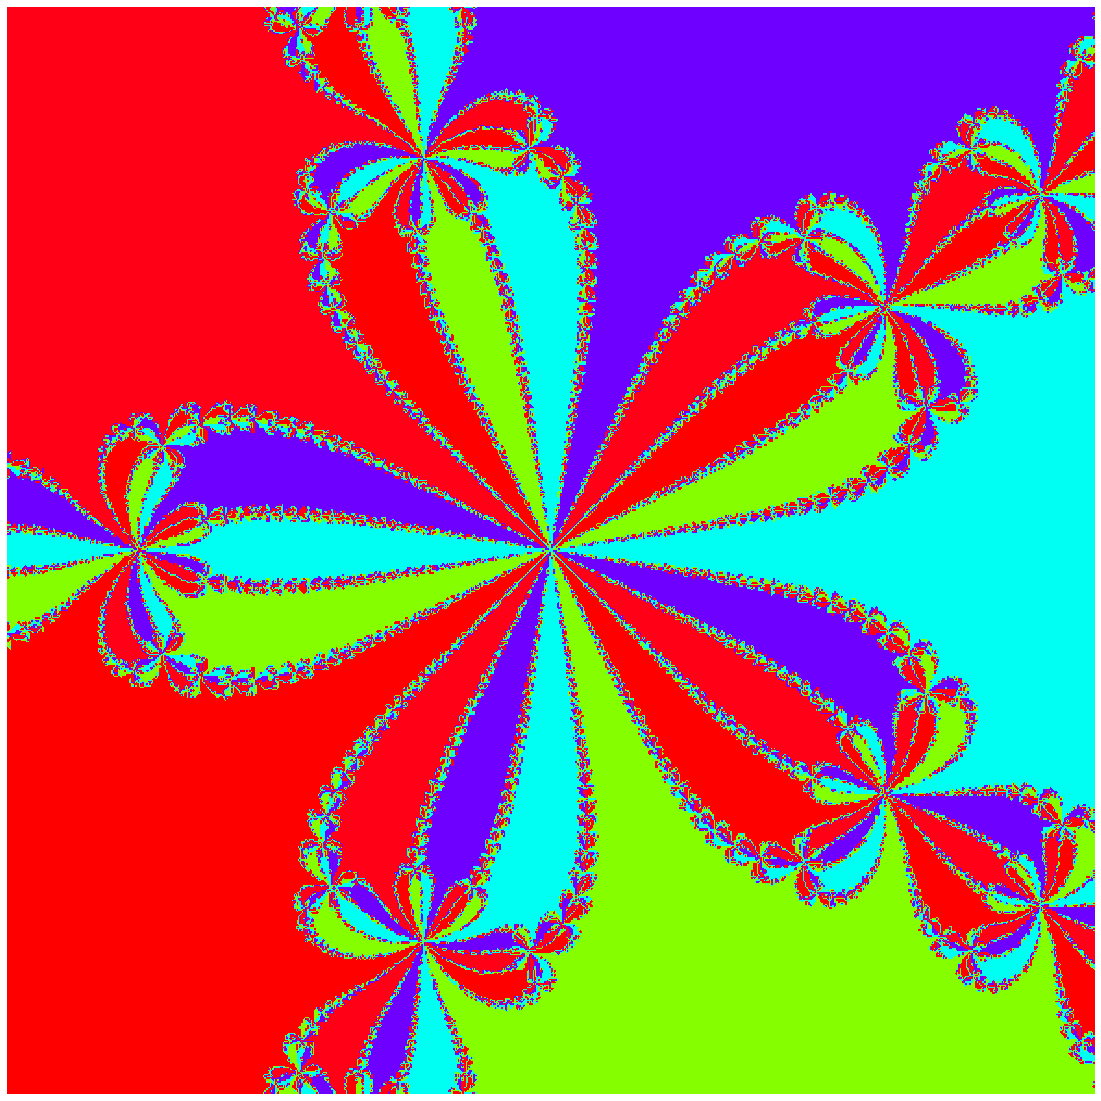

In [77]:
f = lambda z: z**5 - 1
fprime = lambda z: 5*z**4
plot_newton_fractal(f, fprime, n=500)

<ipython-input-76-2e6c72f9a16c>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', len(roots))


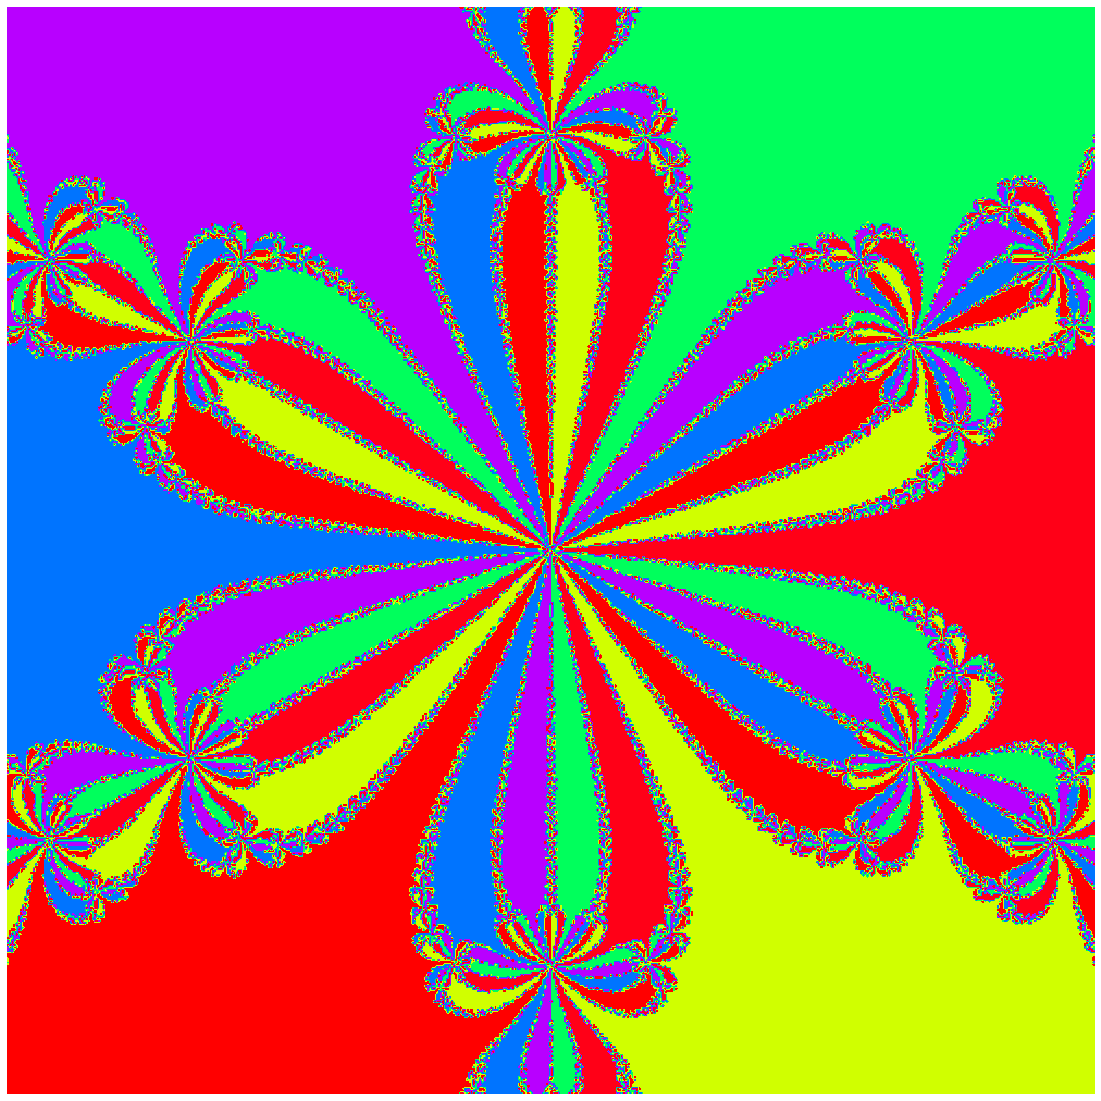

In [78]:
f = lambda z: z**6 - 1
fprime = lambda z: 6*z**5
plot_newton_fractal(f, fprime, n=500)

<ipython-input-79-8e3eeaf763c6>:1: RuntimeWarning: overflow encountered in scalar power
  f = lambda z: z**20 - 1
<ipython-input-79-8e3eeaf763c6>:1: RuntimeWarning: invalid value encountered in scalar power
  f = lambda z: z**20 - 1
<ipython-input-79-8e3eeaf763c6>:2: RuntimeWarning: overflow encountered in scalar power
  fprime = lambda z: 20*z**19
<ipython-input-79-8e3eeaf763c6>:2: RuntimeWarning: invalid value encountered in scalar power
  fprime = lambda z: 20*z**19
<ipython-input-79-8e3eeaf763c6>:2: RuntimeWarning: invalid value encountered in scalar multiply
  fprime = lambda z: 20*z**19
<ipython-input-76-2e6c72f9a16c>:4: RuntimeWarning: invalid value encountered in scalar divide
  dz = f(z) / fprime(z)
<ipython-input-79-8e3eeaf763c6>:2: RuntimeWarning: overflow encountered in scalar multiply
  fprime = lambda z: 20*z**19
<ipython-input-76-2e6c72f9a16c>:4: RuntimeWarning: overflow encountered in scalar divide
  dz = f(z) / fprime(z)
<ipython-input-76-2e6c72f9a16c>:39: MatplotlibDe

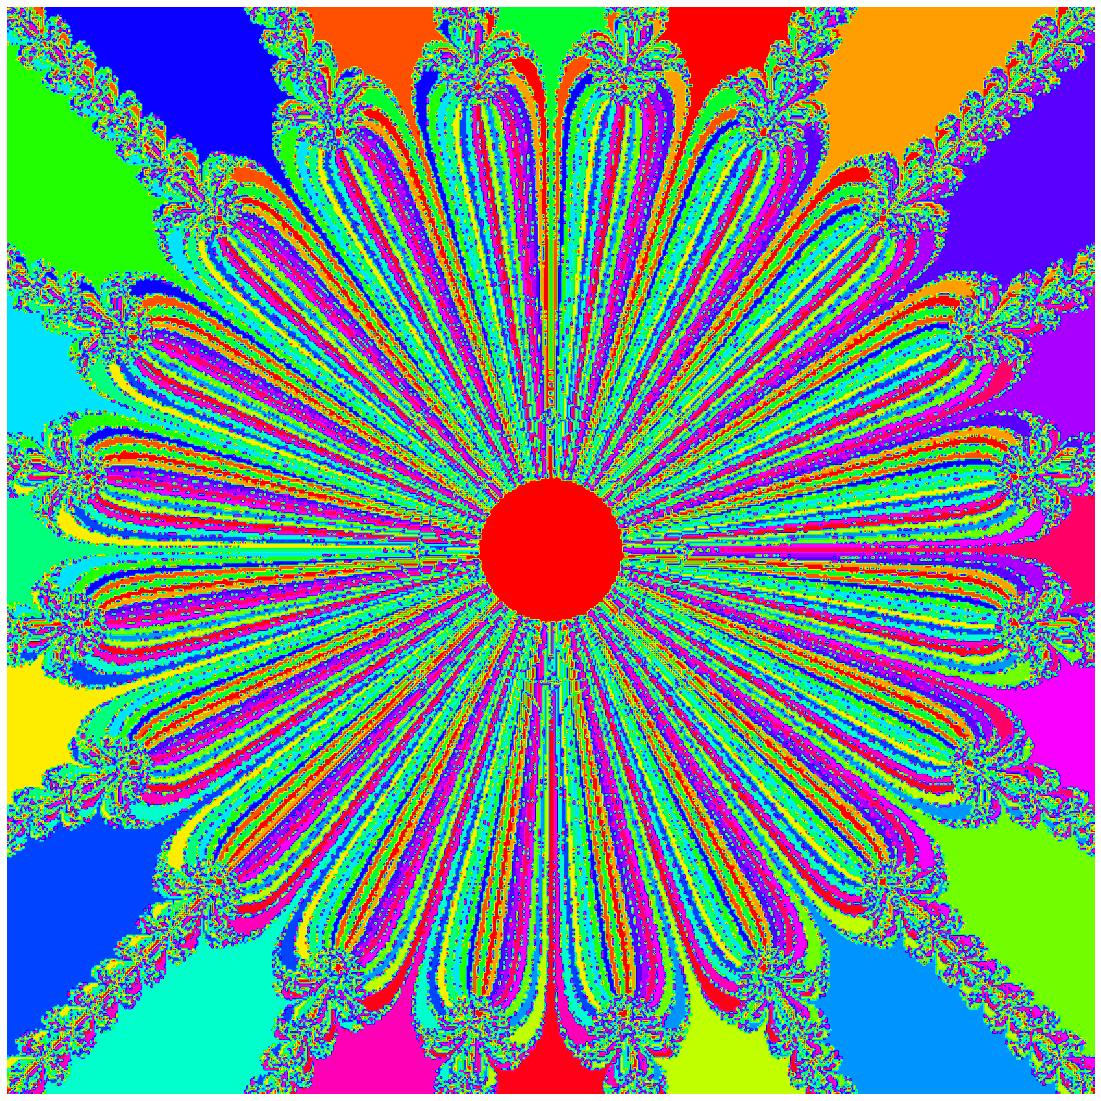

In [79]:
f = lambda z: z**20 - 1
fprime = lambda z: 20*z**19
plot_newton_fractal(f, fprime, n=500)

<ipython-input-76-2e6c72f9a16c>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv', len(roots))


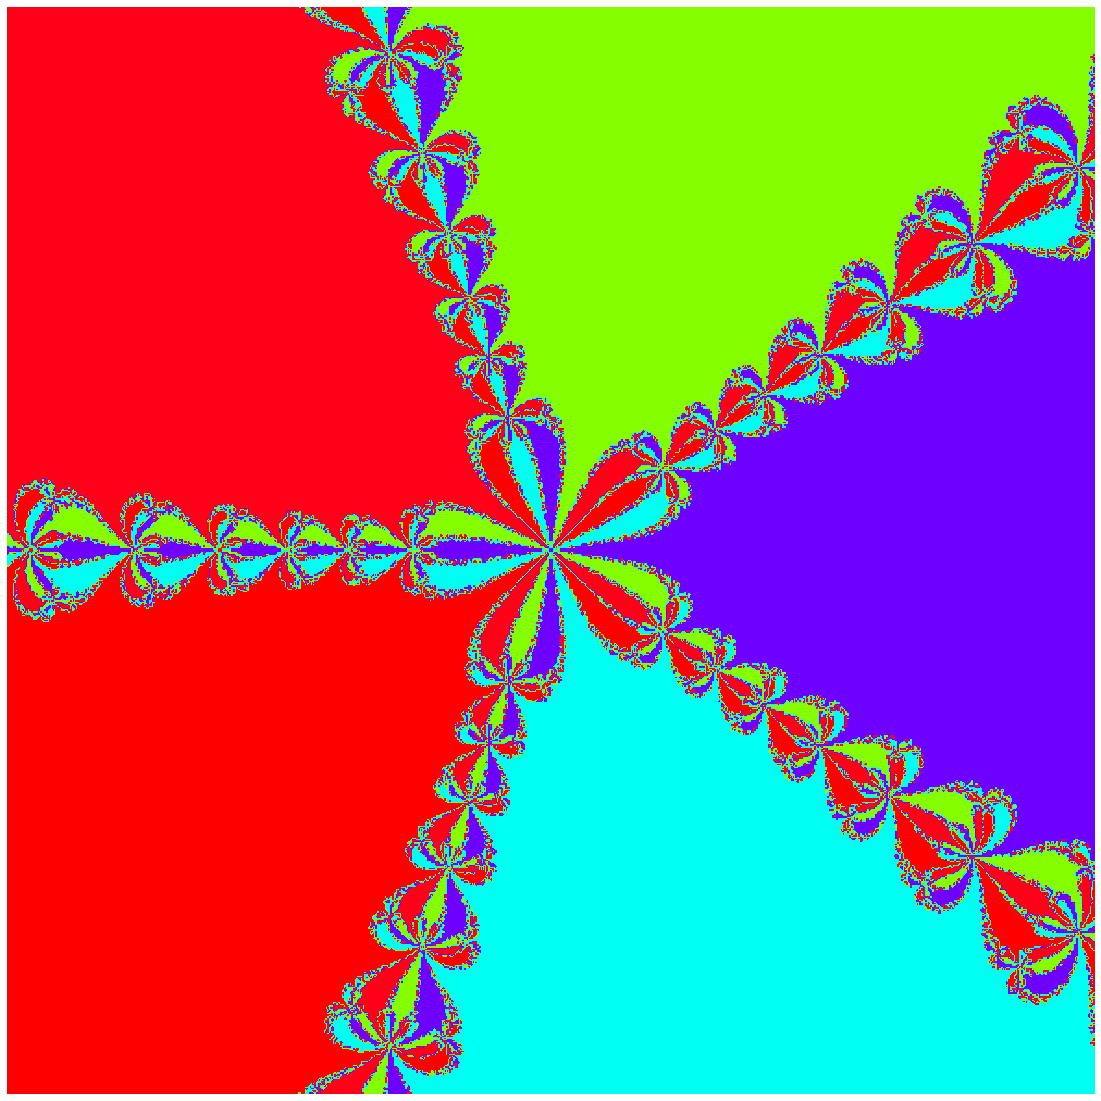

In [80]:
f = lambda z: z**5 - 1
fprime = lambda z: 5*z**4
plot_newton_fractal(f, fprime, n=500, domain=(-3, 3, -3, 3))